# 株式データ分析

こんにちは．[しんせいたろう](https://twitter.com/shinseitaro)です．米株などを取引する個人トレーダーです．データ分析を元に取引しています．

Fintech関連の勉強会に参加したり，主催したりしていますが，同業界でなかなか女性にお会いすることがなく，今回は PyladiesTokyo Advent カレンダーに投稿して女性の方にこちらの世界に興味を持って頂ければ，と思い参加しました．宜しくお願いします．

第一章では， pandas を使ってデータの表示，プロット方法や，ちょっとした分析を行い、統計学の基礎的な話をします。

### 想定読者

+ python 中級者
+ ある程度 pandas が使える人
+ [PythonユーザのためのJupyter[実践]入門](https://www.amazon.co.jp/dp/4774192236)はだいたいついて行けるという人
+ 世の中には株というものが存在する，というくらいは知っている人

---

### 事前準備

#### install 

+ pandas 
+ numpy 
+ matplotlib 
+ jupyter notebook 

#### データ

[ダウンロードセンター](https://indexes.nikkei.co.jp/nkave/index?type=download)から，`日経平均株価＞日次データ` 

---


<h3 style="border-bottom: 1px solid #000;padding: 7px;">Read CSV</h3>


In [1]:
%matplotlib inline

# file を DataFrame に読み込む
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np

plt.style.use('ggplot') #おしゃれスタイル


# filepath 
f = "/tmp/nikkei_stock_average_daily_jp.csv"
# encoding指定, セパレータ指定， index として使う行の指定を追加して csv を DataFrame にする
df = pd.read_csv(f, encoding="shift-jis",  sep=',', index_col="データ日付")

# 最終行5行を表示
df.tail()

,終値,始値,高値,安値
データ日付,,,,
2018/10/29,21149.80,21323.61,21465.99,21109.97
2018/10/30,21457.29,21049.52,21568.40,21035.88
2018/10/31,21920.46,21569.56,21920.46,21530.39
2018/11/01,21687.65,21906.41,21906.41,21628.45
本資料は日経の著作物であり、本資料の全部又は一部を、いかなる形式によっても日経に無断で複写、複製、転載または流布することができません。,NaN,NaN,NaN,NaN


In [2]:
# 最終行は不必要なので除去
df = df.iloc[:-1] 

In [3]:
df.tail()

,終値,始値,高値,安値
データ日付,,,,
2018/11/07,22085.80,22189.74,22444.65,21996.94
2018/11/08,22486.92,22446.01,22583.43,22421.00
2018/11/09,22250.25,22471.31,22494.58,22226.01
2018/11/12,22269.88,22121.70,22324.01,22046.29
2018/11/13,21810.52,21885.24,21892.29,21484.65


In [4]:
# index の型を確認．dtype='object'
df.index

Index(['2015/01/05', '2015/01/06', '2015/01/07', '2015/01/08', '2015/01/09',
       '2015/01/13', '2015/01/14', '2015/01/15', '2015/01/16', '2015/01/19',
       ...
       '2018/10/31', '2018/11/01', '2018/11/02', '2018/11/05', '2018/11/06',
       '2018/11/07', '2018/11/08', '2018/11/09', '2018/11/12', '2018/11/13'],
      dtype='object', name='データ日付', length=950)

In [5]:
# 日時データを扱う datetime 型に上書きする
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-13', '2015-01-14', '2015-01-15',
               '2015-01-16', '2015-01-19',
               ...
               '2018-10-31', '2018-11-01', '2018-11-02', '2018-11-05',
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-12', '2018-11-13'],
              dtype='datetime64[ns]', name='データ日付', length=950, freq=None)

<h3 style="border-bottom: 1px solid #000;padding: 7px;">描画</h3>


（**メモ**： 描画の際，日本語が表示されない場合は，[PythonユーザのためのJupyter［実践］入門](https://www.amazon.co.jp/dp/B075F3CHZ4)の38ページ〜を参照してください）



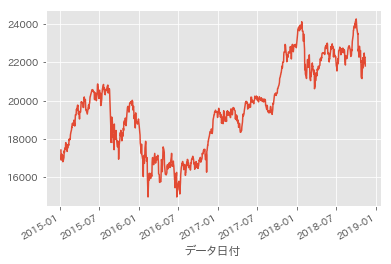

In [6]:
plt.rcParams['font.family'] = 'IPAPGothic'

# 終値だけ折れ線グラフで表示
df["終値"].plot()

少し味気ないので，フォーマットやグリッドの変更を加えてみます．

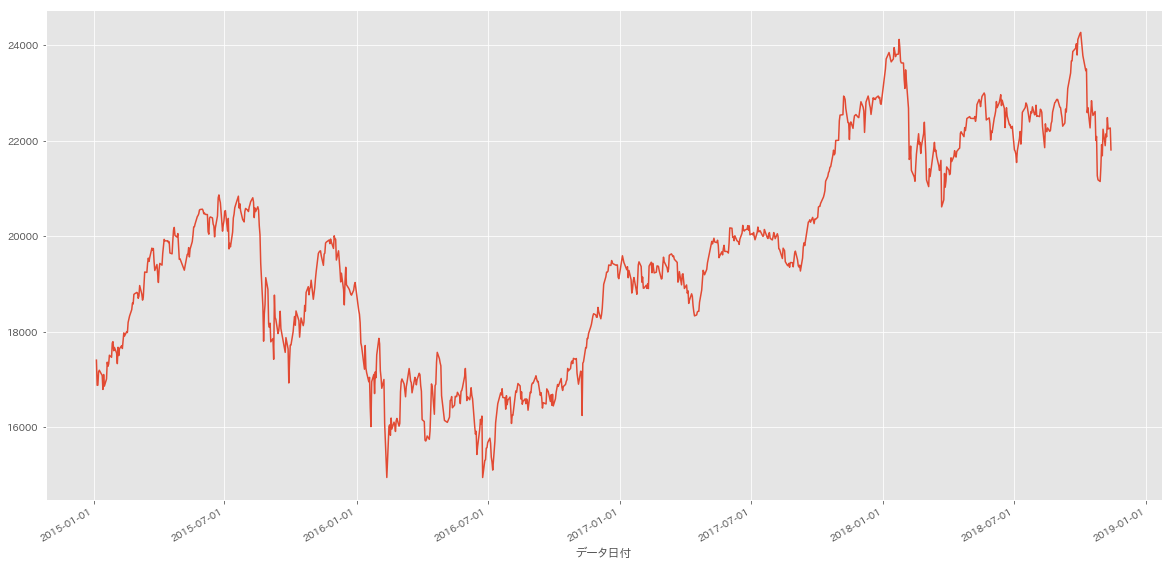

In [7]:
# x軸の日付フォーマットを変更
# プロットのサイズを大きく変更
# グリッドを表示
# (ここはsubplotで書き直すべきかなー？)
ax = df["終値"].plot(figsize=(20,10), grid=True)
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


#### 毎日の収益を確認する

毎日の収益率。= `今日の終値/前日の終値-1` 

[pct_change](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html)で計算



In [8]:
df["終値"].pct_change().tail()

データ日付
2018-11-07   -0.002797
2018-11-08    0.018162
2018-11-09   -0.010525
2018-11-12    0.000882
2018-11-13   -0.020627
Name: 終値, dtype: float64

横軸に日付、縦軸に収益率で、点でプロット


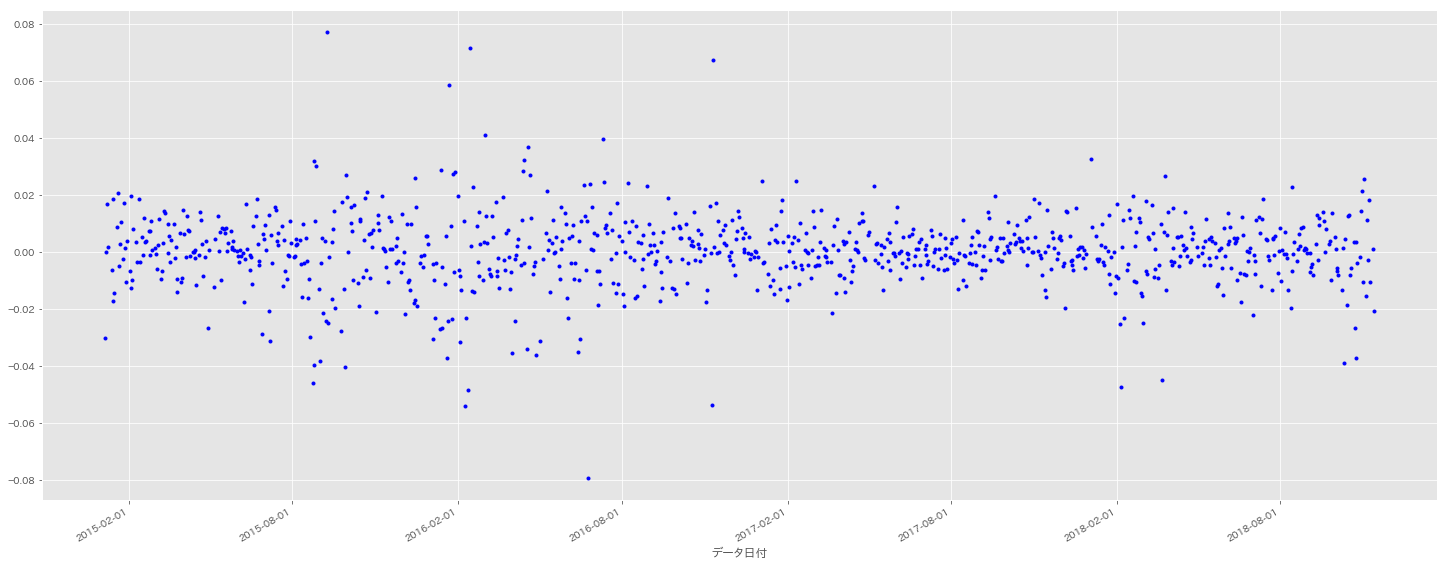

In [9]:
ax = df["終値"].pct_change().plot.line(style=['b.'], figsize=(25,10), grid=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


観察印象

+ 2015年8月頃〜2016年前半くらいまで点が上下に大きくバラバラ動いて見える
+ 2017年8月前後は，点が0.00近くに寄っているように見える
+ 大体の点は-0.02〜0.02の間に入っているように見える
+ 時期によってばらつきが大きく異なる




<h3 style="border-bottom: 1px solid #000;padding: 7px;">すこしだけ統計学の話</h3>


### 「ある同一の分布から独立に抽出された標本である」とは

統計学の目的の一つは、**観察対象全体の構造（特徴）を、対象の一部の情報だけを利用して予測すること**、があります。

ここで、

+ 観察対象を「**母集団**」
+ 一部の情報を「**標本**」
+ 標本に含まれるデータ数を「**サンプルサイズ**」

といいます。

例えば、全国の25歳〜29歳の就業者全員の年収の平均を知りたいとします。

全員のデータを集めるのは、時間的にもコスト的にも無理です。

全国の25-29歳から**無作為**に10人選びます。それを三回繰り返しデータを集めます。

ここでは、

+ 母集団：全国の25歳〜29歳の就業者全員の年収
+ 標本：無作為に10人選ぶ事を三回繰り返して得たデータ
+ サンプルサイズ：10

ということになります。図にするとこうなります。


![標本](../statics/2018-11-16_001.jpg)
[44の例題で学ぶ計量経済学 | Ohmsha](https://www.ohmsha.co.jp/book/9784274069314/)より


今データは、**無作為に選ぶ（＝無作為に抽出）**しているので、どのデータも**同じ確率**で選び出しています。
どのデータも公平に選ばれたということです。

これを **「ある同一の分布から独立に抽出された標本である」** と言います。

### 分布

ここに多面体（ｎ面体）のサイコロがあるとします。各面は、1から1+nの整数が書いてあります。このサイコロを降って値を取得する関数はこのように書けます。


In [10]:
def dice1(n):
    i = np.random.randint(n)
    return range(1, 1+n)[i]
dice1(10)


3

10回降ると、↑の様に目が出ます。
この時、サイコロを投げて出る目は　`[1,2,3,4,5,6,7,8,9,10]` のいずれかでその確率は1/10です。

このように `確率が存在`する時の変数を**確率変数** といいます。確率変数をXで表すと、

$ P(X) =  \frac{1}{10},  (X=1,2,3,4,5,6,7,8,9,10) $ 

と表現でき、

+ `P(X) `: **確率**
+ `X`: **確率変数**
+ `サイコロを投げて出た　1,2,3,4,5,6,7,8,9,10のいずれかの値` ：**確率変数の実現値**

といいます。

---

今度は多面体の作る条件を少し変更します。

多面体を作る時、連続した数値を各面に入れますが、重複していても構わないという条件に変更します。

つまり、10面体をつくる場合、`[1, 2, 3, 4, 4, 5, 6, 7, 7, 8]`になるかもしれませんし、`[1, 1, 2, 3, 4, 5, 6, 7, 8, 9]` かもしれません。連続していなくてはいけないので、`[1, 2, 3, 4, 4, 7, 7, 9, 10, 10]` や `[1, 1, 3, 4, 4, 5, 6, 7, 8, 9]` などはNGです。

この場合、重複の多い数字が各目のでやすさになります。

まずは可視化してみましょう。こういう場合は、ヒストグラム（度数分布表）を使うと直感的にわかります。



In [11]:
# 1〜10の数値（重複可）の目を持つサイコロを10000回（=十分に大きい回数）降った時のサイコロの実現値
# 注意：randintが取る数値の範囲をサイコロを降る回数の1％にすることで、
# 十分にサイコロを降れば、発生しない数値はないだろうという推測のもと、作っています。

def dice2_entity(n):
    np.random.seed(0)
    return np.random.randint(1, int(n*0.01)+1, size = n)


In [12]:
dice2_実現値 = dice2_entity(10000)    
len(dice2_実現値), len(np.unique(dice2_実現値))


(10000, 100)

(array([114.,  86.,  88., 125.,  99., 117.,  94., 100.,  98., 111., 100.,
        109., 102., 103.,  80.,  90., 100., 116.,  87.,  86.,  96.,  96.,
         99.,  91., 101.,  98., 104., 110., 103., 123., 104.,  87., 109.,
        110., 101., 116.,  99., 107., 115.,  89., 105., 117.,  92., 106.,
         84., 104.,  94., 112., 101., 107.,  88., 109.,  93.,  94.,  95.,
         87., 108., 107., 113.,  94.,  99., 107.,  95.,  79., 102., 104.,
         91., 100.,  93., 110.,  86., 107.,  98.,  94.,  88., 109., 102.,
         82.,  94.,  96.,  95., 114.,  93.,  92., 105., 104.,  87., 100.,
        109., 105.,  89., 110., 104.,  92., 110.,  97.,  82., 108.,  91.,
        104.]),
 array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
          8.92,   9.91,  10.9 ,  11.89,  12.88,  13.87,  14.86,  15.85,
         16.84,  17.83,  18.82,  19.81,  20.8 ,  21.79,  22.78,  23.77,
         24.76,  25.75,  26.74,  27.73,  28.72,  29.71,  30.7 ,  31.69,
         32.68,  33.67,  34.66

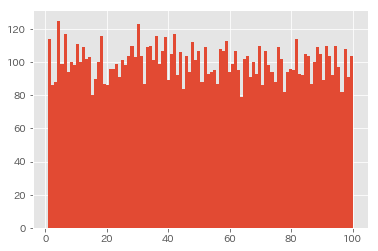

In [13]:
plt.hist(dice2_実現値, bins=100)


In [14]:
# ４が120回以上出ていてトップですね。このことから今作ったサイコロはおそらく4を重複して持っている可能性があります。
# 数えて見ましょう。
unique, counts = np.unique(dice2_実現値, return_counts=True)
pd.Series(dict(zip(unique, counts))).sort_values(ascending=False).head()

4     125
30    123
6     117
42    117
18    116
dtype: int64

ヒストグラムを見て、このサイコロは4が一番出やすい事がわかりました。つまり４が出る確率が最も高いということです。

ヒストグラムは、各目の出る割合を表しています。棒の高さは確率の推定値を表わしていると言えます。

つまり、各棒の総和を1にすれば、各目が出る確率が算出できます。

例えば、4が出る確率は `1:10000=x:125` より 0.0125、1.25％ということになります。

これを算出するための関数を **密度関数** と言います。

もしサイコロを降る回数が少なかったりして、一部の目が出ない場合、離散値を取りますが、その場合は、密度関数ではなく **確率関数** と呼びます。

--- 

ところで、dice1 を10000回投げてヒストグラムを作ってみましょう

(array([ 998.,  962., 1024.,  995., 1011., 1027., 1025.,  984.,  978.,
         996.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

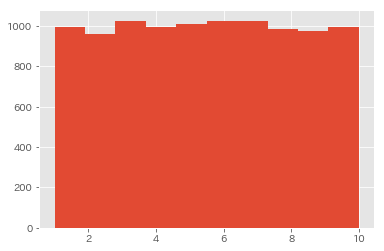

In [15]:
dice1_実現値 = [dice1(10) for i in range(10000)]
plt.hist(dice1_実現値, )


いい感じで全部同じ位出現しています。dice2のヒストグラムも大体同じくらい各目が出現しているといってもそんなにウソではありませんね。
このように、ヒストグラムを見ることで各目がどのくらいの様子で出現しているか大体わかりますね。

この様子の事を **分布** と言います。

そして、**ちょくちょく出現する分布には「よくこんな分布になっちゃうんだよね、名前つけちゃおうよ。」**となり、有名な分布には名前がついています。

（それは、ハゲの様子に、M字ハゲ、O字ハゲ、U字ハゲと名前をつけてしまう態度と同じです。）

例えば、サイコロの様に、だいたい同じ確率で発生する様子をあらわした分布は **離散一様分布**と言います。以下に有名な分布を上げます。

離散一様分布	
![](https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/probdist_unidecr.jpg)

二項分布
![](https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/probdist_binomial.jpg)

ポアソン分布
![](https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/probdist_poisson.jpg)

正規分布（ガウス分布）
![](https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/probdist_normal.jpg)

ガンマ分布
![](https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/probdist_gamma.jpg)

標準正規分布
![](https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/probdist_normalstandard.jpg)


その他色々、こちらから見てみてください。
[さまざまな確率分布 probability distributions - 数理的思考 - 中川雅央 【知と情報の科学】](https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/statdist.html)





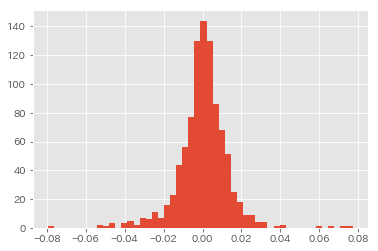

In [16]:
#ではここで日経平均の前日比のヒストグラムを見てみましょう。
    

df['終値'].pct_change().hist(bins=50)
                                                                               

正規分布（標準正規分布）に形が似ています。

株式の前日比はこの分布になることがよく観察される事から、**この分布になるだろうという仮定の元**、今後の株価を予測するということをよく行います。これを覚えて置いてください。


## まとめ

+ CSVデータをDataFrameにする方法
+ データの扱い方
+ 描画方法
+ ある同一の分布から独立に抽出された標本であるとは
+ 分布

